In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

computer =  blogin1
working directory set to /home/hbkoziel/pyfesom


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import pandas as pd
import cartopy
import cartopy.crs as ccrs

No joblib
no cmocean


In [3]:
# PLOT CONFIGURATION #

# figure export 
export_plot = True
# figure export definition
dpicnt=300
# choose simulation
runid='Arc12'
# choose date
first_year = 1980
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = False
# load the given biological tracer #
var_id= 'area'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = '/home/hbkoziel/awi-models//data/mesh/meshArc4.5/'
outputpath = '/scratch/usr/hbkoziel/Arc12/CSV/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/pyfesom/figures/Arc12/ already existing


In [4]:
mesh = pf.load_mesh(meshpath, usepickle=True,get3d=get3d)

/home/hbkoziel/awi-models/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/awi-models/data/mesh/meshArc4.5/pickle_mesh


In [5]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [6]:
print 'loading data...'
DATA = genfromtxt(outputpath+'DSIsurf_MAR_'+str(first_year)+'_'+str(last_year)+'_timeseries.csv', delimiter=';')
print 'DONE'

loading data...
DONE


In [7]:
print DATA.shape

(36, 753179)


In [8]:
print('loading index...')
df = pd.read_csv('/home/hbkoziel/awi-models/data/mesh/meshArc4.5/bioregion_index_latlon.csv', delimiter=',',header=0)
print('DONE')
#df.head()

loading index...
DONE


In [9]:
df.sort_values(by ='Unique_ID',inplace=True)
index = df["Unique_ID"]
index_unique = df.Unique_ID.unique().tolist()
index_unique.pop(-1)
index_unique

[24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0]

In [10]:
names = df.Name.unique().tolist()
names.pop(-1)
names[3]='Beaufort Sea - shelf'
names[4]='Amundsen-Viscount'
names.append('All Arctic Ocean (>66N)')
names

['Arctic Ocean -- Atlantic Basin',
 'Arctic Ocean -- Pacific Basin',
 'Baffin Bay -- Canadian Shelf',
 'Beaufort Sea - shelf',
 'Amundsen-Viscount',
 'Chukchi Sea',
 'Baffin Bay',
 'East Greenland Shelf',
 'East Siberian Sea',
 'Eastern Bering Sea',
 'Fram Strait',
 'High Arctic Archipelago',
 'Hudson Complex',
 'Iceland Shelf',
 'Kara Sea',
 'Labrador Sea Basin',
 'Lancaster Sound',
 'Laptev Sea',
 'North Greenland',
 'North and East Barents Sea',
 'Northern Grand Banks - Southern Labrador',
 'Northern Labrador',
 'Northern Norway and Finnmark',
 'Norwegian Sea',
 'West Greenland Shelf',
 'Western Bering Sea',
 'White Sea',
 'All Arctic Ocean (>66N)']

In [11]:
# # Reproject the data / get projections #1 with masked lon-lat vectors
# crs_latlon = ccrs.PlateCarree()
# crs = ccrs.NorthPolarStereo()
# num_id=29
# index = df["Unique_ID"]
# fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=dict(projection=crs))
# ax.plot(df.lon[index==num_id],df.lat[index==num_id],'r.',markersize=12, transform=crs_latlon)
# ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor='lightgray', edgecolor='gray')

In [12]:
pp = np.zeros((36,28))

for bio_id in range(0,28):
    #print(['bioregion name = ',names[bio_id],'; numeric id =',bio_id+24])
    for ind in range(0,len(years)):
        #print years[ind]
        if bio_id ==27:
            ind_arc = np.nonzero((mesh.y2>66))
            pp[ind,bio_id] = np.sum(DATA[ind,ind_arc]*NodalAreaModel[ind_arc])/np.sum(NodalAreaModel[ind_arc])
        else:
            #df_lon.lon[df.full_index[index==num_id]]
            ind_bio = df.full_index[df.Unique_ID == bio_id+24]
            pp[ind,bio_id] = np.sum(DATA[ind,ind_bio]*NodalAreaModel[ind_bio])/np.sum(NodalAreaModel[ind_bio])

In [13]:
# bio_id = 29
# ind_bio = df.full_index[df.Unique_ID == bio_id]
# crs_latlon = ccrs.PlateCarree()
# crs = ccrs.NorthPolarStereo()
# index = df["Unique_ID"]

# fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=dict(projection=crs))

# ax.plot(mesh.x2[df.full_index[index==bio_id]],mesh.y2[df.full_index[index==bio_id]],'r.',markersize=1, transform=crs_latlon)
# ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor='lightgray', edgecolor='gray')

In [14]:
# lonfile    = '/home/hbkoziel/awi-models/data/mesh/meshArc4.5/lon.csv'
# latfile    = '/home/hbkoziel/awi-models/data/mesh/meshArc4.5/lat.csv'


# df_lon = pd.read_csv(lonfile, header=None, sep = ',', decimal=".")
# df_lat = pd.read_csv(latfile, header=None, sep = ',', decimal=".")

# df_lon.columns = ['lon']
# df_lat.columns = ['lat']

# # Reproject the data / get projections
# crs_latlon = ccrs.PlateCarree()
# crs = ccrs.NorthPolarStereo()
# num_id=29
# index = df["Unique_ID"]

# fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=dict(projection=crs))

# ax.plot(df_lon.lon[df.full_index[index==num_id]],df_lat.lat[df.full_index[index==num_id]],'r.',markersize=1, transform=crs_latlon)
# ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor='lightgray', edgecolor='gray')

In [15]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

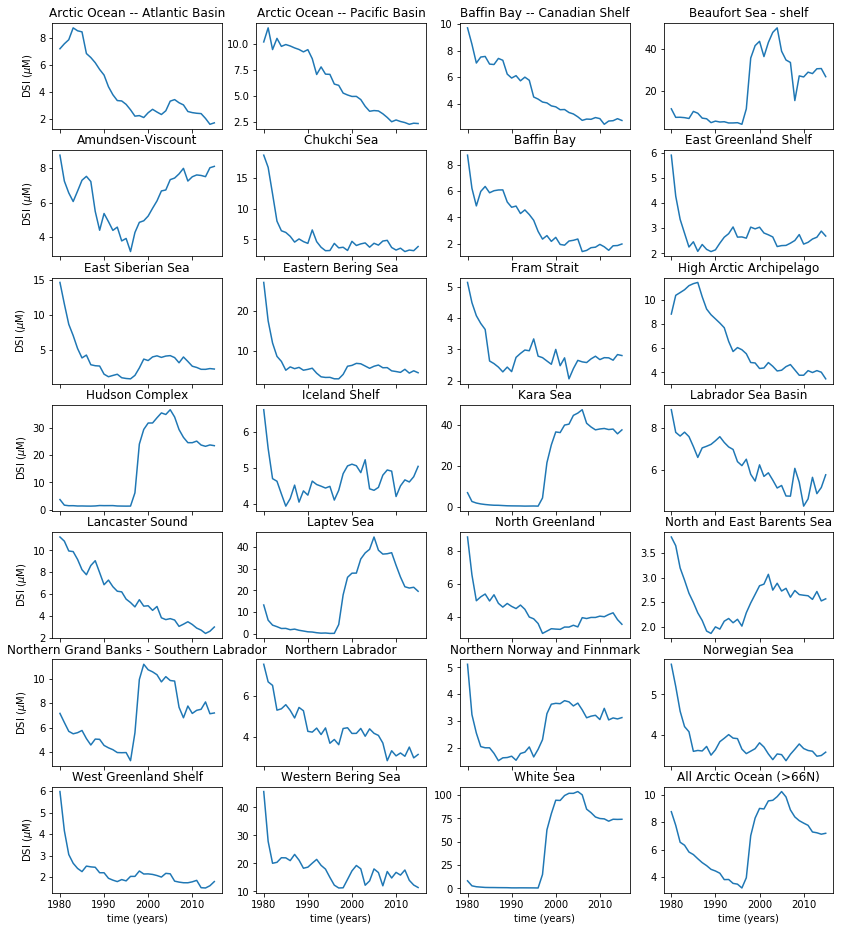

In [16]:
figsize = (14, 16)
rows,cols = 7,4
regions = range(0,28)

axs = plt.figure(figsize=figsize, constrained_layout=False).subplots(rows,cols,sharey=False,sharex=True)
axs = trim_axs(axs, len(regions))

for ax, b in zip(axs, regions):
    ax.plot(years,pp[:,b])
    ax.set_title(names[b])
    if b in np.arange(0,28,4):
        ax.set_ylabel('DSI ($\mu$M)')
    if b in np.arange(24,28):
        ax.set_xlabel('time (years)')
    
plt.savefig(savepath+'sertemp/DSIsurf_MAR_timeseries_'+str(first_year)+'_'+str(last_year)+'.png', dpi = dpicnt, bbox_inches='tight')      